In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

X = np.hstack((np.ones((n,1)), X))  # append a column of ones

In [9]:
lam = 0.5
sig_vals = np.linspace(0.1, 30, 100)

error_rate = []

for sigma in sig_vals:
    distsq=np.zeros((n,n),dtype=float)

    for i in range(0,n):
        for j in range(0,n):
            d = np.linalg.norm(X[i,:]-X[j,:])
            distsq[i,j]=d**2
            
    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K+lam*np.identity(n))@y

    # prediction
    y_hat_pred = []
    g = n
    y_hat_pred = np.zeros((g,1))

    for i,x1 in enumerate(X):
        y_hat_pred[i] = np.exp(-np.linalg.norm(
            X - x1, axis = 1)**2/(2*sigma**2))@alpha

    y_hat = np.sign(y_hat_pred)   

    errors = [0 if i[0]==i[1] else 1 for i in np.hstack((y, y_hat))]
    error_rate.append(sum(errors)/len(errors))

for i in range(len(error_rate)):
  if (error_rate[i]>0): break
  print(sig_vals[i])

0.1
0.40202020202020206
0.704040404040404
1.006060606060606
1.3080808080808082
1.6101010101010103
1.912121212121212


Text(0, 0.5, 'Error Rate')

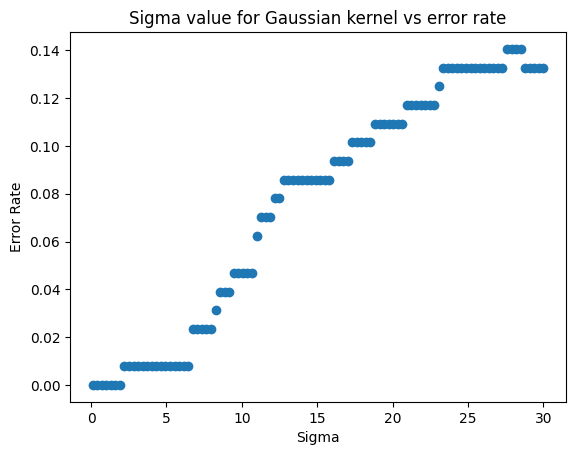

In [10]:
plt.scatter(sig_vals, error_rate)

plt.title("Sigma value for Gaussian kernel vs error rate")
plt.xlabel("Sigma")
plt.ylabel("Error Rate")

## 1c: 8-fold

In [11]:
lam = 0.5
sig_vals = np.linspace(0.1, 30, 100)

error_rate = []

# for each sig value
for sigma in sig_vals:
  eight_sets = np.split(X, 8)
  eight_y = np.split(y, 8)
  total_error = 0

  # cross validation
  for i in range(8):
    # remove one set from the eight
    training = np.delete(eight_sets, i, axis=0).reshape(-1, 10)
    training_y = np.delete(eight_y, i, axis=0).reshape(112, -1)

    n, p = np.shape(training)
    distsq=np.zeros((n,n),dtype=float)

    for j in range(0,n):
        for k in range(0,n):
            d = np.linalg.norm(training[j,:]-training[k,:])
            distsq[j,k]=d**2
            
    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K+lam*np.identity(n))@training_y

    # prediction on holdout
    y_hat_pred = []
    g = len(eight_sets[i])
    y_hat_pred = np.zeros((g,1))

    for l,x1 in enumerate(eight_sets[i]):
        y_hat_pred[l] = np.exp(-np.linalg.norm(
            training - x1, axis = 1)**2/(2*sigma**2))@alpha

    y_hat = np.sign(y_hat_pred)   

    # errors for the holdout set
    errors = [0 if i[0]==i[1] else 1 for i in np.hstack((eight_y[i], y_hat))]
    total_error += sum(errors)/16

  error_rate.append(total_error/8) # average error of the eight holdout sets

Text(0, 0.5, 'Error Rate')

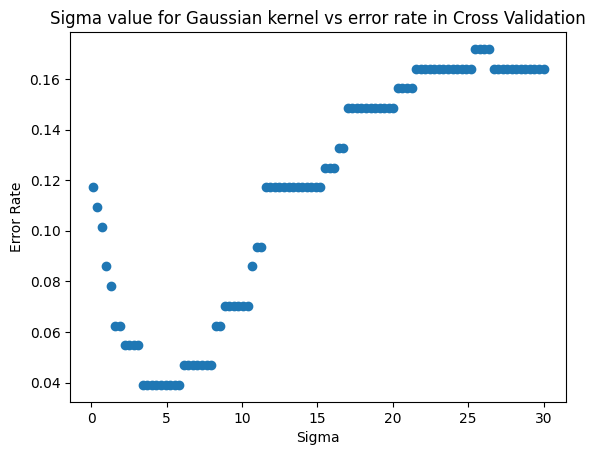

In [12]:
plt.scatter(sig_vals, error_rate)

plt.title("Sigma value for Gaussian kernel vs error rate in Cross Validation")
plt.xlabel("Sigma")
plt.ylabel("Error Rate")